In [31]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import os
import sys
import copy 
import pickle

import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.transforms import Affine2D

from astropy import units as u
from astropy.io import fits
from astropy.wcs import WCS
from astropy.table import Table, Column, vstack, join
from astropy.visualization.wcsaxes import WCSAxes

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
data_dir = '/Users/song/Downloads/decals_color/'

In [85]:
brick_1_fits = fits.open(os.path.join(data_dir, 'legacysurvey-3166p125-image-r.fits.fz'))[1]
brick_1_wcs = WCS(brick_1_fits.header)

brick_1_jpg = mpimg.imread(os.path.join(data_dir, 'legacysurvey-3166p125-image.jpg'))

In [95]:
brick_2_fits = fits.open(os.path.join(data_dir, 'legacysurvey-3169p125-image-r.fits.fz'))[1]
brick_2_wcs = WCS(brick_2_fits.header)

brick_2_jpg = mpimg.imread(os.path.join(data_dir, 'legacysurvey-3169p125-image.jpg'))

pixel_size = brick_2_wcs.proj_plane_pixel_scales()[0].to('arcsec').value

ra_0, ra_1 = 316.79, 316.82
dec_0, dec_1 = 12.539, 12.574
x_edge, y_edge = 15, 10
scale_bar_arcsec = 30.

corner_1 = brick_2_wcs.all_world2pix([ra_1], [dec_0], 1)
corner_2 = brick_2_wcs.all_world2pix([ra_0], [dec_1], 1)

x_0, x_1 = int(corner_1[0] - x_edge), int(corner_2[0] + x_edge)
y_0, y_1 = int(corner_1[1] - y_edge), int(corner_2[1] + y_edge)
x_size, y_size = int(x_1 - x_0), int(y_1 - y_0)

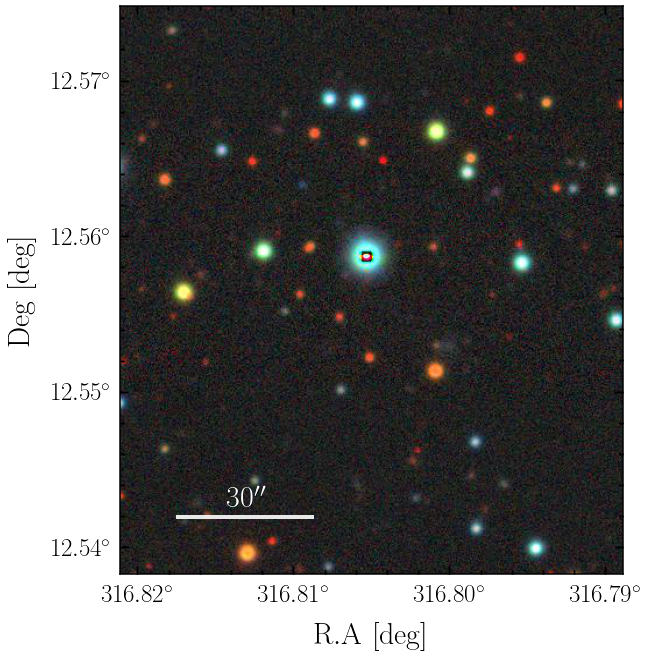

In [96]:
dpi = 48

fig = plt.figure(figsize=(x_size / dpi, y_size / dpi))

coord_meta = {}
coord_meta['name'] = 'ra', 'dec'
coord_meta['type'] = 'longitude', 'latitude'
coord_meta['wrap'] = 180, None
coord_meta['unit'] = u.deg, u.deg
coord_meta['format_unit'] = None, None

#ax = WCSAxes(fig, [0.1, 0.1, 0.8, 0.8], aspect='equal', coord_meta=coord_meta)

ax = fig.add_subplot(1, 1, 1, projection=brick_2_wcs, coord_meta=coord_meta)
ax.imshow(brick_2_jpg, aspect="auto")
ax.grid(on=False)

lon = ax.coords[0]
lat = ax.coords[1]

lon.set_axislabel(r'$\rm R.A\ [deg]$', fontsize=30)
lat.set_axislabel(r'$\rm Deg\ [deg]$', fontsize=30)

lon.set_major_formatter('d.dd')
lat.set_major_formatter('d.dd')

_ = ax.set_xlim(x_0, x_1)
_ = ax.set_ylim(y_0, y_1)

scale_bar_x_off, scale_bar_y_off = 50, 50
scale_bar = scale_bar_arcsec / pixel_size

_ = ax.plot(
    [x_0 + scale_bar_x_off, x_0 + scale_bar_x_off + scale_bar], 
    [y_0 + scale_bar_y_off, y_0 + scale_bar_y_off], linewidth=4, c='w', alpha=0.9)

_ = ax.text(
    x_0 + scale_bar_x_off + scale_bar / 2,
    y_0 + scale_bar_y_off * 1.2,
    r'$30^{\prime\prime}$', 
    fontsize=30, horizontalalignment='center', color='w')

In [84]:
fig.savefig('/Users/song/Desktop/test.jpg', dpi=dpi)